In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
print(plt.style.available)
mpl.style.use("seaborn-ticks")

['seaborn-notebook', 'seaborn-darkgrid', 'seaborn-colorblind', 'seaborn-pastel', 'seaborn-dark-palette', 'seaborn-paper', 'grayscale', 'ggplot', 'seaborn-ticks', '_classic_test', 'seaborn-bright', 'classic', 'seaborn-dark', 'seaborn-white', 'seaborn-talk', 'seaborn-deep', 'bmh', 'seaborn', 'fast', 'seaborn-whitegrid', 'seaborn-poster', 'Solarize_Light2', 'fivethirtyeight', 'dark_background', 'seaborn-muted']


In [3]:
#list of files needed to be done
f = open('/home/hermuba/data/genomeList/ECgenome.txt') # a txt file containing e.coli genome without duplicate
genome = f.readlines()
f.close()

# remove \n
for i in range(len(genome)):
    genome[i] = genome[i].rstrip().replace(u'\ufeff', '')

# random select 10% genome to test pangenome
import random
sampled = random.sample(genome, 5))

print(sampled)

['1438675.3', '1328441.3', '562.16324', '562.10576', '1438694.3']


In [13]:
os.system('makeblastdb -in GCF_000005845.2_ASM584v2_protein.faa -input_type fasta -dbtype prot')

0

In [18]:
# blast every genome against k12
import os
genomesOnly = sampled
for j in genomesOnly:
    os.system('blastp -query /home/hermuba/data/genePredicted/'+ j +'.faa -db GCF_000005845.2_ASM584v2_protein.faa -evalue 1e-5 -outfmt 6 -max_target_seqs 1 >'+ j+'.txt')


In [15]:
# a function to go throught output file from blastp and plot
def blastp2df(blastresult):
    # read the file
    outputF = open(blastresult +'.txt') # blastresult file  
    x = outputF.readlines()
    outputF.close()
    
    # parsedList is a list of splitted lines from each line of blastresult file
    parsedList = []
    for i in range(len(x)):
        parsedList.append(x[i].rstrip().split('\t')) # each line has 12 elements
    
    # make parsedList into a dataframe
    df = pd.DataFrame(parsedList,
                  columns = ['query_id',
                             'subject_id',
                             'pct_identity',
                             'aln_length',
                             'n_of_mismatches',
                             'gap_openings',
                             'q_start',
                             'q_end',
                             's_start',
                             's_end',
                             'e_value',
                             'bit_score'])
    
    # change to appropriate datatype
    df[['pct_identity','e_value','bit_score']] = df[['pct_identity','e_value','bit_score']].astype('float')
    df[['aln_length','n_of_mismatches','gap_openings','q_start','q_end','s_start','s_end']] = df[['aln_length','n_of_mismatches','gap_openings','q_start','q_end','s_start','s_end']].astype('int')
    
    # return dataframe
    return(df)

In [19]:
# iterate through all genomes
listofDf = []
totaldf = pd.DataFrame()
for k in sampled:
    df = blastp2df(k)
    listofDf.append(df)
    totaldf = totaldf.append(df)
    

In [22]:
totaldf

,query_id,subject_id,pct_identity,aln_length,n_of_mismatches,gap_openings,q_start,q_end,s_start,s_end,e_value,bit_score
0,JMVD01000001_1,NP_414743.1,99.251,267,2,0,1,267,1,267,0.000000e+00,540.0
1,JMVD01000001_2,NP_414744.1,99.342,304,2,0,1,304,1,304,0.000000e+00,616.0
2,JMVD01000001_3,NP_414745.1,100.000,259,0,0,1,259,8,266,0.000000e+00,533.0
3,JMVD01000001_4,NP_414746.1,93.171,205,14,0,52,256,3,207,4.280000e-141,391.0
4,JMVD01000001_5,NP_414747.1,100.000,406,0,0,1,406,47,452,0.000000e+00,835.0
5,JMVD01000001_6,NP_414748.1,99.203,251,2,0,1,251,1,251,0.000000e+00,522.0
6,JMVD01000001_7,NP_414749.2,98.750,240,3,0,1,240,1,240,5.680000e-180,490.0
7,JMVD01000001_8,NP_414750.1,100.000,155,0,0,1,155,1,155,7.930000e-118,326.0
8,JMVD01000001_9,NP_414751.1,99.177,243,2,0,4,246,1,243,0.000000e+00,503.0
9,JMVD01000001_10,NP_414752.1,95.019,261,13,0,1,261,1,261,0.000000e+00,520.0


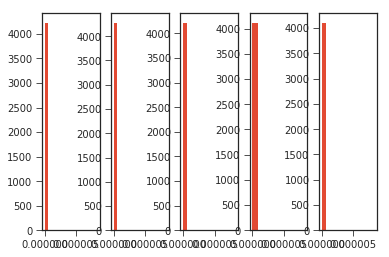

In [21]:
# nested plot demostrating all e-values found blasting against K12
fig2, axs = plt.subplots(1, 5, sharex = True)

l = 0
for ax in axs.flat: #this will iterate over all 6 axes

    ax.hist(listofDf[l]['e_value'])
    l = l+1



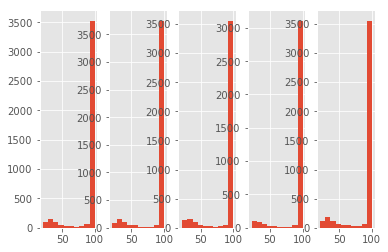

In [139]:
# nested plot demostraing all identity found
fig2, axs = plt.subplots(1, 5, sharex = True)

l = 0
for ax in axs.flat: #this will iterate over all 6 axes
    #ax.set_xscale('log')
    #ax.set_yscale('log')
    ax.hist(listofDf[l]['pct_identity'])
    l = l+1

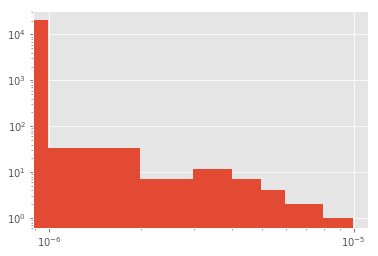

In [137]:
# all e-value add together (5 genomes)
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.hist(totaldf['e_value'])
ax.set_xscale('log')
ax.set_yscale('log')

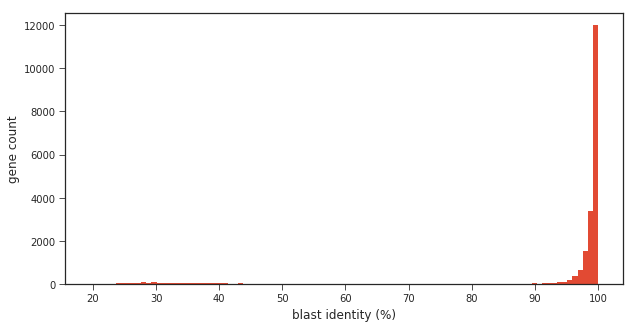

In [30]:
# all identity add together (5 genomes)
fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(1, 1, 1)
ax.hist(totaldf['pct_identity'], bins = 100)
ax.set_xlabel('blast identity (%)')
ax.set_ylabel('gene count')
plt.savefig("count.pdf", format = 'pdf')